In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from matplotlib import pyplot as plt

In [5]:
rcParams['pdf.use14corefonts'] = True

In [6]:
import numpy

In [7]:
with open("/checkpoint/wav2letter/transfer_learning/transformer_lms/wsj_data/am/si284.lst.remap", "r") as f:
    list_data = numpy.array([line.strip() for line in f])
with open("/checkpoint/wav2letter/transfer_learning/transformer_lms/wsj_data/am/si284.lst.remap", "r") as f:
    duration = numpy.array([float(line.strip().split(" ")[2]) for line in f])

9.49977447504874 0.8966652192200604 1 12


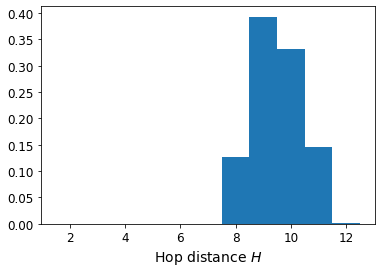

In [12]:
for i in range(1):
    numpy.random.seed(i)
    duration_rand = numpy.array(duration) * (numpy.random.rand(len(duration)) * 0.3 + 0.85)
    indices = numpy.argsort(duration_rand)[::-1]
    list_data_sort = list_data[indices]
    duration_sort = duration[indices]
    
    batches = []
    current_batch = 0
    current_max_len = 0
    batch = []
    max_dur = 120000
    for index, elem in enumerate(duration_sort):
        new_max_len = max(current_max_len, elem)
        if (len(batch) + 1) * new_max_len <= max_dur:
            current_max_len = new_max_len
            batch.append(index)
        else:
            batches.append(batch)
            current_max_len = elem
            batch = [index]

    if len(batch) > 0 and current_max_len * len(batch) <= max_dur:
        batches.append(batch)
#     print(len(batches))
    
    strides = []
    for b in batches:
        current_time = duration_sort[b]
        mean_dur = numpy.mean(current_time)
        strides += [int(d / mean_dur * 10) for d in current_time]
    print(numpy.mean(strides), numpy.std(strides), min(strides), max(strides))
    plt.hist(strides, bins=numpy.arange(min(strides) + 0.5, max(strides) + 1), density=True)
    plt.xlabel("Hop distance $H$", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig("wsj_hop_pdf.png", dpi=300, bbox_inches="tight")
    plt.show()
#     with open("/checkpoint/wav2letter/transfer_learning/transformer_lms/wsj_data/am/si284.lst.remap.stride.epoch_" + str(i), "w") as f:
#         for data, stride in zip(list_data_sort, strides):
#             tmp = data.strip().split(" ")
#             tr = "" if len(tmp) == 3 else " ".join(tmp[3:])
#             f.write("{} {} {} {} {}\n".format(tmp[0], tmp[1], tmp[2], stride, tr))

In [19]:
!ls /checkpoint/wav2letter/transfer_learning/transformer_lms/wsj_data/am/si284.lst.remap.stride.epoch_* | head

/checkpoint/wav2letter/transfer_learning/transformer_lms/wsj_data/am/si284.lst.remap.stride.epoch_0
/checkpoint/wav2letter/transfer_learning/transformer_lms/wsj_data/am/si284.lst.remap.stride.epoch_1
/checkpoint/wav2letter/transfer_learning/transformer_lms/wsj_data/am/si284.lst.remap.stride.epoch_10
/checkpoint/wav2letter/transfer_learning/transformer_lms/wsj_data/am/si284.lst.remap.stride.epoch_100
/checkpoint/wav2letter/transfer_learning/transformer_lms/wsj_data/am/si284.lst.remap.stride.epoch_1000
/checkpoint/wav2letter/transfer_learning/transformer_lms/wsj_data/am/si284.lst.remap.stride.epoch_1001
/checkpoint/wav2letter/transfer_learning/transformer_lms/wsj_data/am/si284.lst.remap.stride.epoch_1002
/checkpoint/wav2letter/transfer_learning/transformer_lms/wsj_data/am/si284.lst.remap.stride.epoch_1003
/checkpoint/wav2letter/transfer_learning/transformer_lms/wsj_data/am/si284.lst.remap.stride.epoch_1004
/checkpoint/wav2letter/transfer_learning/transformer_lms/wsj_data/am/si284.lst.rem

In [18]:
with open("/checkpoint/wav2letter/transfer_learning/aws/interspeech/tl.train.lst", "r") as f:
    list_data = numpy.array([line.strip() for line in f])
with open("/checkpoint/wav2letter/transfer_learning/aws/interspeech/tl.train.lst", "r") as f:
    duration = numpy.array([float(line.strip().split(" ")[2]) for line in f])
    
for i in range(980, 2100):
    numpy.random.seed(i)
    duration_rand = numpy.array(duration) * (numpy.random.rand(len(duration)) * 0.3 + 0.85)
    indices = numpy.argsort(duration_rand)[::-1]
    list_data_sort = list_data[indices]
    duration_sort = duration[indices]
    
    batches = []
    current_batch = 0
    current_max_len = 0
    batch = []
    max_dur = 240000
    for index, elem in enumerate(duration_sort):
        new_max_len = max(current_max_len, elem)
        if (len(batch) + 1) * new_max_len <= max_dur:
            current_max_len = new_max_len
            batch.append(index)
        else:
            batches.append(batch)
            current_max_len = elem
            batch = [index]

    if len(batch) > 0 and current_max_len * len(batch) <= max_dur:
        batches.append(batch)
#     print(len(batches))
    
    strides = []
    for b in batches:
        current_time = duration_sort[b]
        mean_dur = numpy.mean(current_time)
        strides += [int(d / mean_dur * 10) for d in current_time]
#     print(numpy.mean(strides), numpy.std(strides), min(strides), max(strides))
#     plt.hist(strides, bins=numpy.arange(min(strides) + 0.5, max(strides) + 1), density=True)
#     plt.xlabel("Hop distance $H$", fontsize=14)
#     plt.xticks(fontsize=12)
#     plt.yticks(fontsize=12)
#     plt.savefig("tl_hop_pdf.png", dpi=300, bbox_inches="tight")
    with open("/checkpoint/wav2letter/transfer_learning/aws/interspeech/tl.train.lst.stride.epoch_" + str(i), "w") as f:
        for data, stride in zip(list_data_sort, strides):
            tmp = data.strip().split(" ")
            tr = "" if len(tmp) == 3 else " ".join(tmp[3:])
            f.write("{} {} {} {} {}\n".format(tmp[0], tmp[1], tmp[2], stride, tr))

In [17]:
!ls /checkpoint/wav2letter/transfer_learning/aws/interspeech/tl.train.lst.stride.epoch_*

/checkpoint/wav2letter/transfer_learning/aws/interspeech/tl.train.lst.stride.epoch_0
/checkpoint/wav2letter/transfer_learning/aws/interspeech/tl.train.lst.stride.epoch_1
/checkpoint/wav2letter/transfer_learning/aws/interspeech/tl.train.lst.stride.epoch_10
/checkpoint/wav2letter/transfer_learning/aws/interspeech/tl.train.lst.stride.epoch_100
/checkpoint/wav2letter/transfer_learning/aws/interspeech/tl.train.lst.stride.epoch_101
/checkpoint/wav2letter/transfer_learning/aws/interspeech/tl.train.lst.stride.epoch_102
/checkpoint/wav2letter/transfer_learning/aws/interspeech/tl.train.lst.stride.epoch_103
/checkpoint/wav2letter/transfer_learning/aws/interspeech/tl.train.lst.stride.epoch_104
/checkpoint/wav2letter/transfer_learning/aws/interspeech/tl.train.lst.stride.epoch_105
/checkpoint/wav2letter/transfer_learning/aws/interspeech/tl.train.lst.stride.epoch_106
/checkpoint/wav2letter/transfer_learning/aws/interspeech/tl.train.lst.stride.epoch_107
/checkpoint/wav2letter/transfer_learning/aws/int

In [15]:
!zip png_plots.zip *.png

  adding: tl.png (deflated 5%)
  adding: tl_ablation.png (deflated 6%)
  adding: tl_ablation_global.png (deflated 7%)
  adding: tl_aug.png (deflated 10%)
  adding: tl_hop_pdf.png (deflated 26%)
  adding: tl_s2s.png (deflated 9%)
  adding: vit_base10.png (deflated 5%)
  adding: vit_mix_ablation.png (deflated 9%)
  adding: vit_scale_ablation.png (deflated 7%)
  adding: vit_sin_ablation.png (deflated 7%)
  adding: vit_size_best.png (deflated 6%)
  adding: vit_speed.png (deflated 13%)
  adding: wsj.png (deflated 7%)
  adding: wsj_ablation.png (deflated 7%)
  adding: wsj_hop.png (deflated 8%)
  adding: wsj_hop_pdf.png (deflated 25%)
